# Minilab 2

Hensikten med denne laboppgaven er: 
1. Kunne måle en tidsserie med akselerasjonsmålinger med phyphox 
2. Eksportere dataene til en PC/match
3. Åpne datafilen i python/jupyter notebook
4. Hente inn og vurdere på dataene (plotte)
5. Kunne plukke ut et selectivt utvalg fra dataseriene
6. Kunne svare på: <span style="color:red">Hva er den største og minste akselerasjonen du bli utsatt for i en heis som går mellom mer enn to etasjer? </span> 


# 3 Importere fila i jupyter / python 

Nå er det bare å lagre fila og pakke den ut på et sted der du også kan lagre denne jupyter notebook fila. I eksemplet under henter jeg ut data fra en kjøring fra E1 til E4 i Realfagbygget bokk E 20 januar 2025. 

In [305]:
import numpy as np
import matplotlib.pyplot as plt

filnavn = 'heis-akselerasjon.csv' # ligger samme sted som jupyter notebook fila
data = np.genfromtxt(filnavn, delimiter=';', skip_header=1)  # Use skip_header=1 to skip the header row if there is one
 


# 4. Hente inn og vurdere på dataene

Først må vi se på dataene. Under har vi hentet inn alle målingne og plottet sammen i samme figur. 

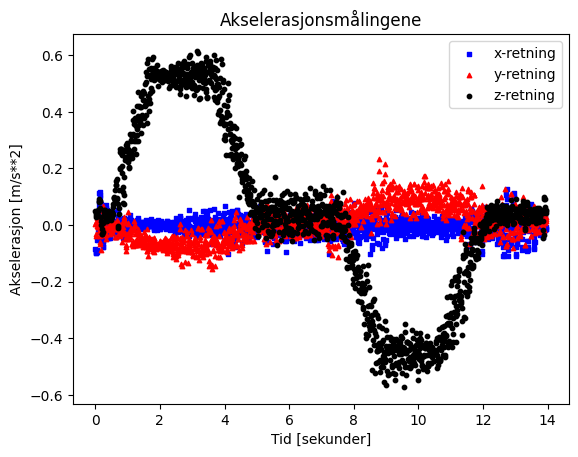

In [306]:
#print(data)
 
plt.scatter(data[:,0] , data[:,1] , color='blue', marker='s', label='x-retning',s=10)
plt.scatter(data[:,0] , data[:,2] , color='red', marker='^', label='y-retning',s=10)
plt.scatter(data[:,0] , data[:,3] , color='black', marker='o', label='z-retning',s=10)

plt.xlabel('Tid [sekunder]')
plt.ylabel('Akselerasjon [m/s**2]')
plt.title('Akselerasjonsmålingene')
 
# Add a legend
plt.legend()
 
# Show the plot
plt.show()



<span style="color:red">Ser dataene fornuftig ut i x- og y retning? </span> 

Svarene i x- og y-retning ser fornuftige ettersom jeg holdt telefonen flatt med skjermen opp, og det er da fornuftig å anta at z-retning viser målingene til telefonens akselerasjon i den bevegelsesretningen. Det er noe støy i målingene som man kan forvente, men telefonen ble lent inntil rekkverket i heisen for å minimere dette.

<span style="color:red">Burde du ha noen kriteriene som du kan bruke for å si at resultatene er fornuftige? </span> 

Man bør ha en formening om hvordan resultatet skal se ut. Ettersom forsøket undersøker akslerasjon i en retning, heisen som går opp og ned, kan man enklere identifisere feil hvis man ser avvik i resultatet som indikerer bevegelse i andre retninger. Har man ha kriterier til hvordan måleinstrumentet er plassert under forsøket kan man forvente et mer fornuftig og repeterbart resultat. 


#### For å kunne se på dataene må vi se nærmere på noen helt spesifikke tidspunkter. Plotter nå bare akselerasjon i z-retning.  


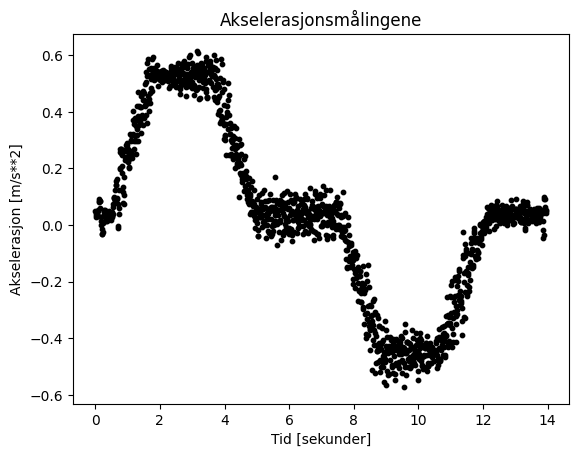

In [307]:
tid = data[:, 0]  # Tid [sekunder]
akselerasjon = data[:, 3]  # Akselerasjon [m/s²]


plt.scatter(tid , akselerasjon , color='black', marker='o', label='z-retning',s=10)
plt.xlabel('Tid [sekunder]')
plt.ylabel('Akselerasjon [m/s**2]')
plt.title('Akselerasjonsmålingene')

# Show the plot
plt.show()

# 5. Kunne plukke ut et selektivt utvalg fra dataseriene

For å finne maksimal akselerasjon kan vi plukke ut og data plotte for z-koordinaten for tidspunkt mellom 1.5 og 4 sekunder 

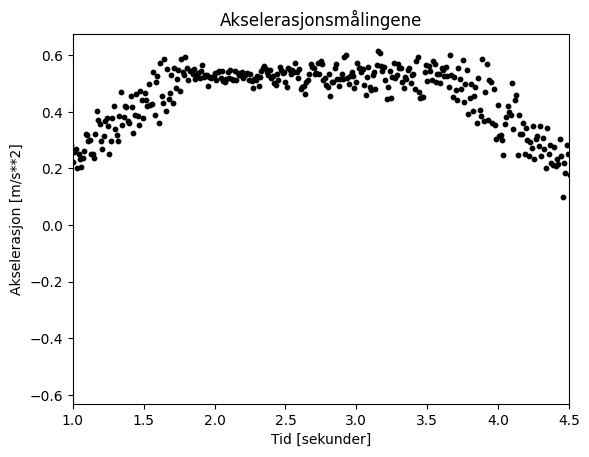

In [308]:

plt.scatter(data[:,0] , data[:,3] , color='black', marker='o', label='z-retning',s=10)
# Mine verdier ser ut til å ha størst akselerasjon mellom 1.5 og 4 sekunder
plt.xlim([1, 4.5]) #Begrenser intervallet
plt.xlabel('Tid [sekunder]')
plt.ylabel('Akselerasjon [m/s**2]')
plt.title('Akselerasjonsmålingene')
 
# Show the plot
plt.show()

Her ser jeg at området rundt 1.75 til 3.75 ser det ut som om vi har en relativt stabil akselerasjon. Nå har jeg behov for å plukke ut målingene som ligger i dette intervallet

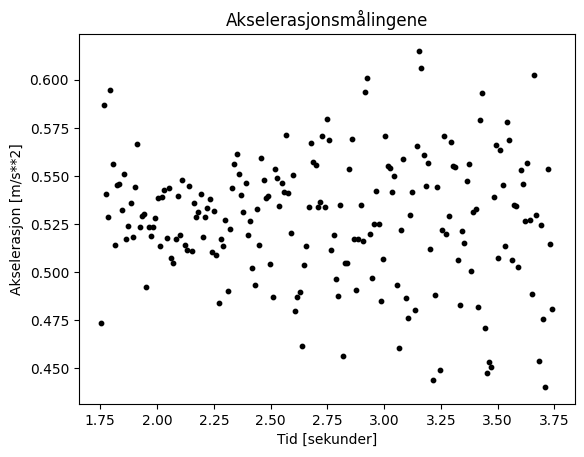

In [309]:
# For mine verdier ser det ut til å egne seg å se på intervallet mellom 1.75 og 3.75

intervallA = (data[:,0] >= 1.75) & (data[:,0] <= 3.75) 
plt.scatter(data[intervallA,0] , data[intervallA,3] , color='black', marker='o', label='z-retning',s=10)
plt.xlabel('Tid [sekunder]')
plt.ylabel('Akselerasjon [m/s**2]')
plt.title('Akselerasjonsmålingene')
 
plt.show()

In [310]:
# Regner ut middelverdi og standardavviket for målingene i intervallet. 

print(f'Maksimal akselerasjon {np.mean(data[intervallA,3]):.4g} ± {np.std(data[intervallA,3]):.2g}')

Maksimal akselerasjon 0.5275 ± 0.033


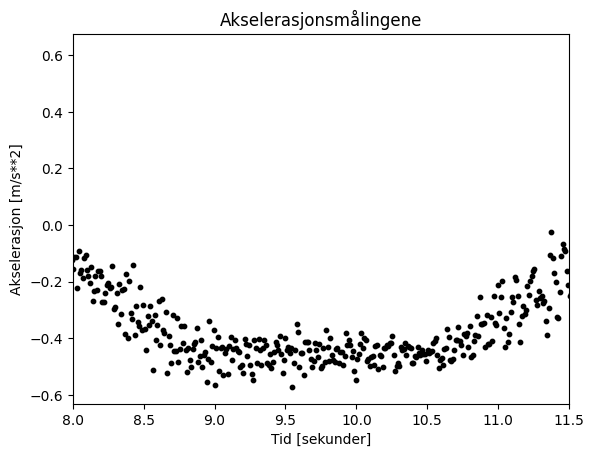

In [311]:

plt.scatter(data[:,0] , data[:,3] , color='black', marker='o', label='z-retning',s=10)
# Mine verdier ser ut til å ha minst akselerasjon mellom 8.0 og 11.5 sekunder
plt.xlim([8.0, 11.5]) #Begrenser intervallet
plt.xlabel('Tid [sekunder]')
plt.ylabel('Akselerasjon [m/s**2]')
plt.title('Akselerasjonsmålingene')
 
# Show the plot
plt.show()

Gjør nå tilsvarende for å finne den minste akselerasjonen jeg er utsatt for. 

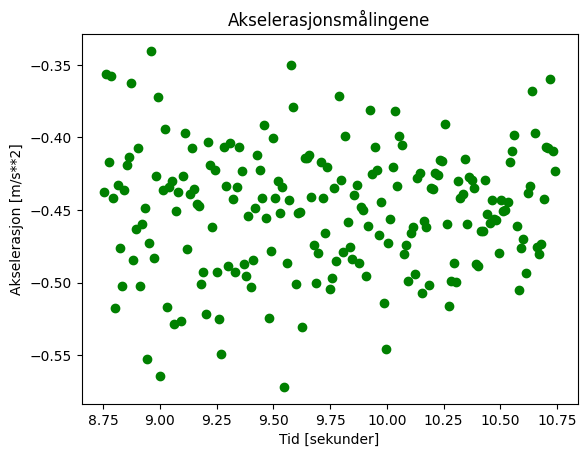

In [312]:
# Søker opp intervallet mellom 8.75 til 10.75 sekunder
intervallB = (data[:,0] >= 8.75) & (data[:,0] <= 10.75) 
plt.scatter(data[intervallB,0] , data[intervallB,3] , color='green', marker='o', label='Data points')
#plt.ylim([8.5,11])
# Add labels and a title
plt.xlabel('Tid [sekunder]')
plt.ylabel('Akselerasjon [m/s**2]')
plt.title('Akselerasjonsmålingene')
 
plt.show()


In [313]:
# Regner ut middelverdi og standardavviket for målingene i intervallet. 

print(f'Minimal akselerasjon {np.mean(data[intervallB,3]):.4g} ± {np.std(data[intervallB,3]):.2g}')


Minimal akselerasjon -0.45 ± 0.042


Den største og minste akselerasjonen som jeg ble utsatt for i løpet av forsøket var, størst akselerasjon 
$(0.5275 ± 0.033) m/s^2$ og minst akselerasjon $(-0.45 ± 0.042) m/s^2$

## Minilab 3

- **Valg av chatbot: Hvilken chatbot brukte du til å finne informasjon?**
\

Chatboten jeg valgte å bruker var ChatGPT 4o.
- **Effektive spørsmål: Hvilke prompt brukte du for å finne riktig metode? (Du kan trenge flere forsøk.)**
\

Støyreduksjon i målinger
Se for deg at du i en tidligere oppgave har målt akselerasjonen i en heis, plottet resultatene og funnet den største akselerasjonen. Nå skal vi ta et steg videre: Hvordan kan vi forbedre disse målingene slik at vi får et mer pålitelig signal? 
Utfordringen:
Rådataene fra sensoren inneholder støy, noe som kan gjøre det vanskelig å trekke presise konklusjoner. For å analysere akselerasjonsdataene bedre, må vi filtrere bort støy og hente ut et glattere signal.
Oppgave
Undersøk hvordan du kan bruke Python til å filtrere bort støy i datasettet ditt. Målet er å få et jevnere signal som ligger stabilt midt i dataserien din. Nødvendig krav for til oppgaven er følgende:
Filtreringsmetode: Velg en annerkjent filtreringsalgoritme og spesifiser hvilken filtreringsalgoritme du valgte, og hvorfor? 
Kildekode: Python-kode som viser hvordan du filtrerte bort støyen.
Visualisering: Et plot som viser det opprinnelige signalet sammen med det filtrerte signalet.

Her er Python-programmet fra den tidligere oppgaven:

```
import numpy as np
import matplotlib.pyplot as plt
filnavn='heis-akselerasjon.csv' # ligger samme sted som jupyter notebook fila
data = np.genfromtxt(filnavn, delimiter=';', skip_header=1)  # Use skip_header=1 to skip the header row if there is one
plt.scatter(data[:,0] , data[:,3] , color='black', marker='o', label='z-retning',s=10)
plt.xlabel('Tid [sekunder]')
plt.ylabel('Akselerasjon [m/s**2]')
plt.title('Akselerasjonsmålingene')
# Show the plot
plt.show()
``` 

- **Filtreringsmetode: Hvilken filtreringsalgoritme valgte du, og hvorfor?**


Filtreringsmetoden jeg valgte å bruke etter anbefaling fra ChatGPT kalles Savitzky-Golay.

- **Visualisering: Et plot som viser det opprinnelige signalet sammen med det filtrerte signalet.**


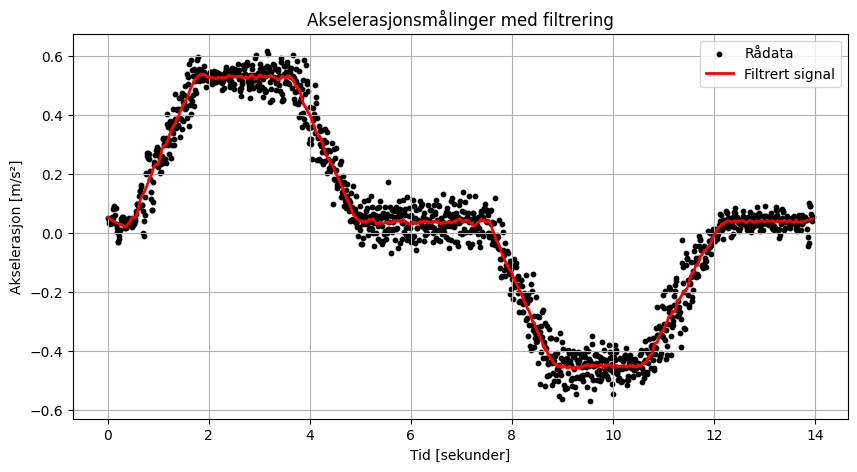

In [314]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import savgol_filter

# Les inn data
filnavn = 'heis-akselerasjon.csv' # ligger samme sted som jupyter notebook fila
data = np.genfromtxt(filnavn, delimiter=';', skip_header=1)

tid = data[:, 0]  # Tid [sekunder]
akselerasjon = data[:, 3]  # Akselerasjon [m/s²]

# Filtrer data med Savitzky-Golay-filter
smoothed_akselerasjon = savgol_filter(akselerasjon, window_length=50, polyorder=2)

# Plott rådata og filtrert signal
plt.figure(figsize=(10, 5))
plt.scatter(tid, akselerasjon, color='black', marker='o', label='Rådata', s=10)
plt.plot(tid, smoothed_akselerasjon, color='red', label='Filtrert signal', linewidth=2)

plt.xlabel('Tid [sekunder]')
plt.ylabel('Akselerasjon [m/s²]')
plt.title('Akselerasjonsmålinger med filtrering')
plt.legend()
plt.grid()
plt.show()


- **Refleksjon: Hvilke utfordringer møtte du underveis, og hvordan løste du dem?**


Etter første spørring fikk jeg en implementasjon der variabelen window_length var satt til en lavere verdi. Dette gjorde at den røde linjen ikke var like glatt. Etter litt testing med ulike verdier fant jeg at en window_length lik 50 ga ett rimelig glatt og fungerende resultat.

## Mini-lab del 4 Numerisk beregning av heisens fart og posisjon


<b>Bakgrunn og mål</b>

I denne siste delen av lab-oppgaven skal du bruke de akselerasjonsdataene du har samlet fra en heis i bevegelse (eksempelvis i Realfagsbygget på NTNU). Formålet med denne oppgaven er å
<ol>
<li>Beregne heisens fart 𝑣(𝑡).</li>
<li>Beregne heisens forflytning 𝑠(𝑡).</li>
<li>Hensikten med denne laben er å få erfaring med presentasjon og formidling av eksperimentelle data.</li>
</ol>

I denne oppgaven kan du støtte deg på/bruke et selvvalgt KI-verktøy.
- **Hvilket KI-systemet bruker du?**

Jeg brukte ChatGPT 4o

- **Hvilket prompt du bruker?**

"Du skal regne ut farten v(t) til heisen fra de målte akselerasjonsdataene a(t). 

Her kan du velge blant flere mulige algoritmer for numerisk integrasjon. Python har ferdige funksjoner for Riemann-sum, trapesmetoden og simpsons metode for numerisk integrasjon (scipy.integrate).

Presenter v(t) som funksjon av tiden.

Verdiene for akselerasjonen og tid er lagret i disse variablene:

tid = data[:, 0]  # Tid [sekunder]
akselerasjon = data[:, 3]  # Akselerasjon [m/s²]"

- **Endelig kildekode skal være med i innleveringen.**


</ol>

# Del A: Beregne farten fra akselerasjonsdata
Du skal regne ut farten $𝑣(𝑡)$ til heisen fra de målte akselerasjonsdataene $𝑎(𝑡)$. I praksis må du løse differensialligningen

$\frac{dv}{dt}=a(t)  \Longrightarrow \int_{v_0}^v dv=\int_{t_0}^t a(t)⋅dt$

Numerisk tilsvarer dette å løse integralet$

$v=v_0+ \int_{t_0}^t a(t) dt$

Her kan du velge blant flere mulige algoritmer for numerisk integrasjon. Python har ferdige funksjoner for Riemann-sum, trapesmetoden og simpsons metode for numerisk integrasjon (scipy.integrate).

<b>Plot av fart vs. tid</b>
<ol>
<li>Regn ut farten 𝑣(𝑡) til heisen fra akselerasjonsdataene.</li>
<li>Presenter 𝑣(𝑡) som funksjon av tiden.</li>
</ol>


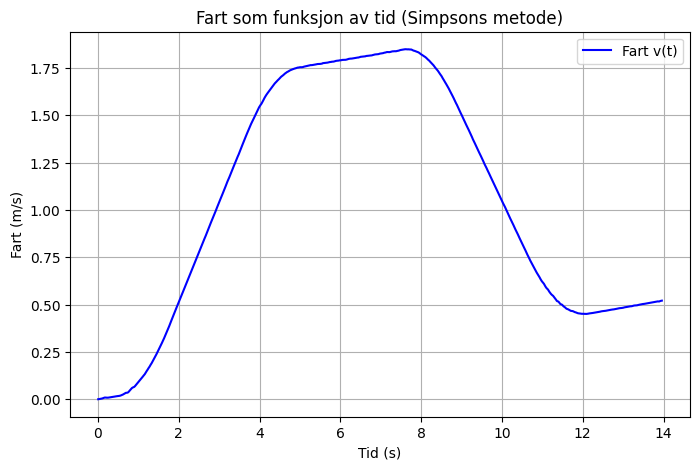

In [315]:
from scipy.integrate import cumulative_simpson

# Initial hastighet
v0 = 0  

# Beregn farten kumulativt ved hjelp av Simpsons metode
hastighet = cumulative_simpson(akselerasjon, x=tid, initial=v0)

# Plot fart vs. tid
plt.figure(figsize=(8, 5))
plt.plot(tid, hastighet, label="Fart v(t)", color="b")
plt.xlabel("Tid (s)")
plt.ylabel("Fart (m/s)")
plt.title("Fart som funksjon av tid (Simpsons metode)")
plt.legend()
plt.grid()
plt.show()


### Refleksjon og feilsøking

- **Vurder om den utregnede farten er rimelig i forhold til det du forventer?**

Farten er rimelig da den går fra null og øker i hastighet idet den begynner å bevege seg oppover, frem til den når en makshastighet, deretter bremser heisen frem til den når etasjen og til slutt har null fart igjen. Funksjonen $v(t)$ har noe feil ettersom den ikke er helt tilbake til null når heisen er ferdig å bevege seg, men dette kan komme av støy i målingene eller unøyaktighet i som kommer av den numeriske integrasjons metoden. 

- **På hvilke tidspunkter i tidsserien forventer du at heisen har hastighet lik null? Stemmer dette med den farten du har regnet ut?**

Som sagt ved forrige punkt forventes det at farten er null ved start og ved slutt, men vi ser at fartsgrafen ikke stemmer helt med dette.

- **Hvis du har problem med punkt 2. Hva skyldes dette? Og hvordan kan du korrigere for dette?**

Ser vi nærmere på verdiene for akselerasjon, plottet i tidligere minilaber, kan vi se at verdiene for akselerasjon er over null når den skal være i ro. Det er sansynnligvis dette som gjør at hastigheten er over null og ser ut til å stige både da den skulle være i ro og da den trolig hadde konstant akselerasjon, i tidsrommet 4s og 8s.

For å korrigere dette kan forsøket gjøres på nytt med mer oppmerksomhet rettet mot målingene slik at akselerasjonen blir nærmere null der det er forventet at den skal være det. Man kan også forsøke å finne en konstant som representerer hvor mye akselerasjonsgrafen er forsøvet og så trekke denne konstanten fra verdiene i plottet. Med den siste metoden bør det nevnes at det er lurt å være bevisst på at slike justeringer ikke bør gjøres ut fra forventede resultater alene, da det kan introdusere bias, men heller hvis man kan begrunne at det er tegn på systematisk feil i dataen.

Etter testing av ulike konstanter kom jeg fram til $C = 0.038$ som gjorde at akselerasjonen var på null der det var forventet. Under har jeg plottet hvordan resultatene ser ut om jeg trekker denne konstanten fra dataen.

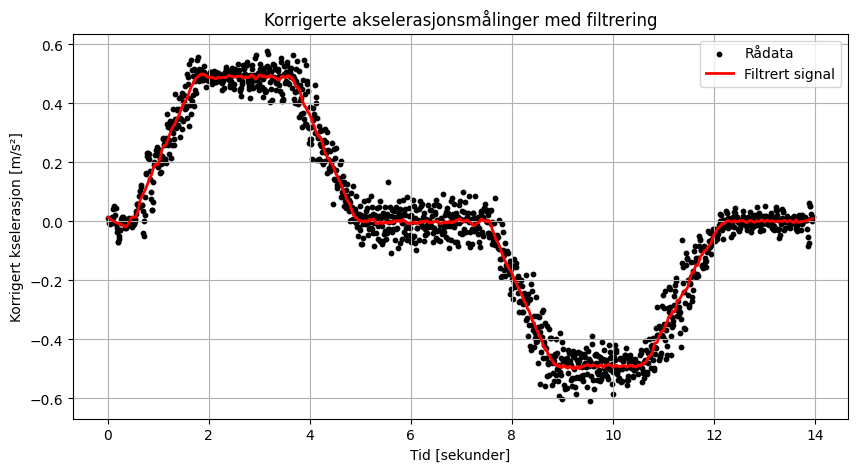

Maksimal akselerasjon 0.4895 ± 0.033
Minimal akselerasjon -0.488 ± 0.042


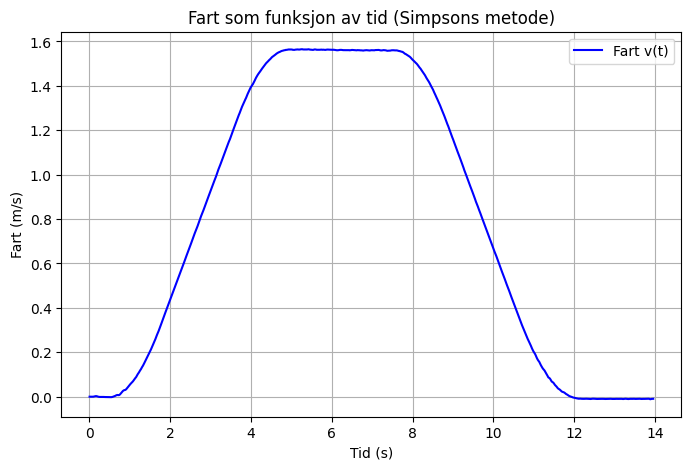

In [316]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import savgol_filter

# Les inn data
filnavn = 'heis-akselerasjon.csv' # ligger samme sted som jupyter notebook fila
data = np.genfromtxt(filnavn, delimiter=';', skip_header=1)

tid = data[:, 0]  # Tid [sekunder]
akselerasjonKorrigert = data[:, 3]  # Akselerasjon [m/s²]

C = 0.038

akselerasjonKorrigert -= C

# Filtrer data med Savitzky-Golay-filter
smoothed_akselerasjon = savgol_filter(akselerasjonKorrigert, window_length=50, polyorder=2)

# Plott rådata og filtrert signal
plt.figure(figsize=(10, 5))
plt.scatter(tid, akselerasjonKorrigert, color='black', marker='o', label='Rådata', s=10)
plt.plot(tid, smoothed_akselerasjon, color='red', label='Filtrert signal', linewidth=2)

plt.xlabel('Tid [sekunder]')
plt.ylabel('Korrigert kselerasjon [m/s²]')
plt.title('Korrigerte akselerasjonsmålinger med filtrering')
plt.legend()
plt.grid()
plt.show()


intervallA = (data[:,0] >= 1.75) & (data[:,0] <= 3.75) 
print(f'Maksimal akselerasjon {np.mean(data[intervallA,3]):.4g} ± {np.std(data[intervallA,3]):.2g}')

intervallB = (data[:,0] >= 8.75) & (data[:,0] <= 10.75) 
print(f'Minimal akselerasjon {np.mean(data[intervallB,3]):.4g} ± {np.std(data[intervallB,3]):.2g}')




from scipy.integrate import cumulative_simpson

# Initial hastighet
v0 = 0  

# Beregn farten kumulativt ved hjelp av Simpsons metode
hastighetKorrigert = cumulative_simpson(akselerasjonKorrigert, x=tid, initial=v0)

# Plot fart vs. tid
plt.figure(figsize=(8, 5))
plt.plot(tid, hastighetKorrigert, label="Fart v(t)", color="b")
plt.xlabel("Tid (s)")
plt.ylabel("Fart (m/s)")
plt.title("Fart som funksjon av tid (Simpsons metode)")
plt.legend()
plt.grid()
plt.show()


# Del B: Beregne posisjonen fra farten

Når farten $v(t)$ er kjent, finner du posisjonen $s(t)$ fra:

$\frac{ds}{dt}=v \Longrightarrow \int_{s_0}^s ds=\int_{t_0}^t v(t)⋅dt$

Ved å benytte samme numeriske metode som i punkt A.


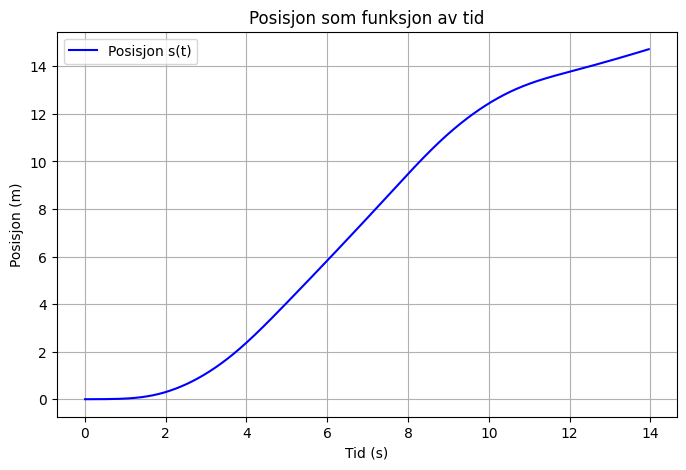

In [317]:
s0 = 0 

# Numerisk integrasjon for å beregne farten
posisjon = cumulative_simpson(hastighet, x=tid, initial=s0)

# Plot av hastighet vs. tid
plt.figure(figsize=(8, 5))
plt.plot(tid, posisjon, label="Posisjon s(t)", color="b")
plt.xlabel("Tid (s)")
plt.ylabel("Posisjon (m)")
plt.title("Posisjon som funksjon av tid")
plt.legend()
plt.grid()
plt.show()


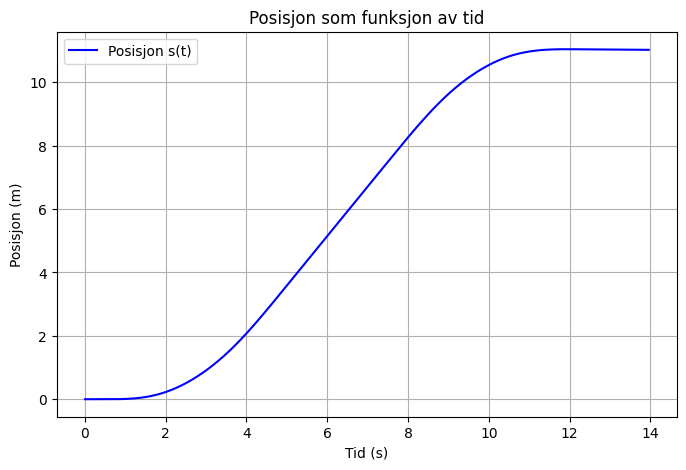

In [318]:
s0 = 0 

# Numerisk integrasjon for å beregne farten
posisjonKorrigert = cumulative_simpson(hastighetKorrigert, x=tid, initial=s0)

# Plot av hastighet vs. tid
plt.figure(figsize=(8, 5))
plt.plot(tid, posisjonKorrigert, label="Posisjon s(t)", color="b")
plt.xlabel("Tid (s)")
plt.ylabel("Posisjon (m)")
plt.title("Posisjon som funksjon av tid")
plt.legend()
plt.grid()
plt.show()


### Analyser bevegelsen:

- **Hvor mange etasjer tok du heisen?**

Det begynner å bli en stund siden jeg gjorde målingene, men jeg mener å huske at jeg tok den fra 1 til 4 etasje, altså tok jeg heisen opp 3 etasjer.

- **Hvor langt har heisen flyttet seg basert på dine målte data?**

Basert på den opprinnelige målte dataen beveget heisen seg $14 m$. Dette betyr at avstanden mellom to etasjer skulle vært $\frac{14 m}{3} = 4.67m$. Bruker jeg den korrigerte dataen beveget heisen seg 10 meter, og avstanden mellom to etasjer ville da basert på den totale strekningen være $\frac{10 m}{3} = 3.5 m$

- **Sammenlign dine resultater med at en målt avstand mellom to etasjer i Realfagbygget er målt til 3.75m med en usikkerhe på 1 cm. $v(t)$**

Avstanden utledet fra den originale dataen, $4.67m$, er langt større en den målte avstanden i Realfagsbygget, $3.75m$. Sammenligner vi avstanden utledet fra den korrigerte dataen, $3.5m$, med den målte observerer at avstanden nå er noe mindre, men at de to avstandene er mer like. Det resterende avviket kan komme av flere andre grunner, f.eks: støy, unøyaktig plassering/oppbevaring av måleinstrument, integrasjonsmetode, osv.

### Refleksjon og feilsøking:

- **Viser resultatene dine en logisk start -og sluttposisjon? (Ser det ut som at heisen står i ro ved start -og sluttposisjon?).**

Hvis vi ser på den originale posisjonsgrafen ser det ikke ut som om heisen står i ro ved sluttposisjon, men i den korrigerte grafen ser ut til å vise en logist start- og sluttposisjon.

- **Kommenter eventuelle problemer med målingene.**

Som nevnt tidligere er det problemer med akselerasjonsmålingen som gjør at akselerasjonen har et tilsynelatende konstant ledd som forskyver akselerasjonsmålingene opp.

- **Konklusjon:**

Basert på analysen ser vi at den opprinnelige posisjonsberegningen ga en avstand som var større enn den målte etasjehøyden i Realfagbygget. Dette skyldes sannsynligvis en skjevhet i akselerasjonsmålingene, og at feilen ble videreført i hastighets- og posisjonsberegningen. Etter å ha korrigert for denne skjevheten ved å trekke fra en konstant, ble de estimerte verdiene betydelig mer lik den faktiske etasjehøyden.
